In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 100
img_height = 300
img_width = 300

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Container/data/train',  #update
    image_size= (img_height, img_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Container/data/test',  #update
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Container/data/val',     #update
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

Found 2313 files belonging to 2 classes.
Found 319 files belonging to 2 classes.
Found 533 files belonging to 2 classes.


In [ ]:
print(class_names)

['Accident', 'Non Accident']


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

img_shape = (img_height, img_width, 3)

In [ ]:
base_model = tf.keras.applications.VGG19(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history =  model.fit(training_ds, validation_data = validation_ds, epochs = 2)

In [ ]:
model.save("Accmodel.keras")

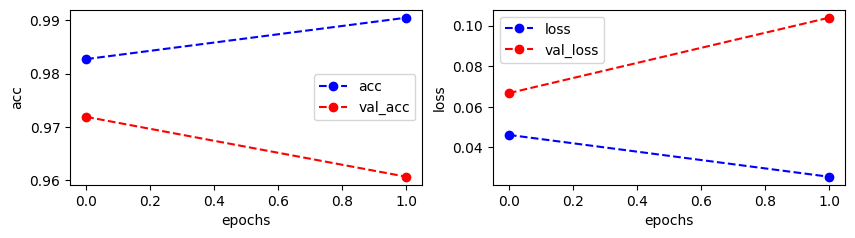

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.subplot(221)
plt.plot(history.history['accuracy'], 'bo--', label="acc")
plt.plot(history.history['val_accuracy'], 'ro--', label="val_acc"z)
plt.ylabel("acc")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'], 'bo--', label="loss")
plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

plt.show()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if (predlabel[i] == class_names[labels[i]]):
          plt.title('Predict: '+ predlabel[i]+' Ans:'+class_names[labels[i]], color = "green")
        else:
          plt.title('Predict: '+ predlabel[i]+' Ans:'+class_names[labels[i]], color = "red")
        plt.axis('off')
        plt.grid(True)

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
saved_model = load_model("/content/Accmodel.keras")
img_add = "non2.jpg"
img = image.load_img(img_add, target_size=(img_width,img_height))
img = np.asarray(img)
##plt.imshow(img)
img = np.expand_dims(img, axis=0)


output = saved_model.predict(img)
print(output)
pred = []
prdlbl = []
for mem in output:
    pred.append(class_names[np.argmax(mem)])
plt.figure(figsize=(30, 30))
for i in range(len(output)):
    #ax = plt.subplot(10, 4, i + 1)
    plt.imshow(plt.imread(img_add))
    plt.title('Predict: '+ pred[0])